============================================================

### REGRESION ANALYSIS HOUSE PRICE CLASSIFICATION

============================================================

Anggota Kelompok :

1. David Hamonangan Sirait

2. Rizky Yuda Pratama

3. Siiriin Nisrinaa

Author : FAUZAN AFIF LUTFIANSAH

Kaggel : https://www.kaggle.com/code/fauzanafiflutfiansah/uas-regresion-analysis-house-price-clasifikasion




**OUR STEPS : **
* Mengerjakan dan datasets (Kaggle.com)
* Uji korelasi antar column (Regresion Analysis:Matrix Korelasi,Sperman ,Kendal,Pearson)
* Data Visualization harga group,max-min
* Model Klasifikasi (SKLearn Library)
* Mengkonversi data + Reshape (Numpy)
* Model Prediksi


In [ ]:
# IMPORT LIBRARY YANG KITA PERLUKAN

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

In [ ]:
# MENGUBAH DADATSETS MENJADI DATA FRAME DAN MELIHAT 5 DATA TERATAS
df = pd.read_excel("/kaggle/input/daftar-harga-rumah/DATA RUMAH.xlsx")
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [ ]:
# MELIHAT KARAKTERISTIK DAN STRUKTUR DATA YANG KITA GUNAKAN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB


In [ ]:
#MENGKONVERSI DATA HARGA RUMAH
df['Harga Rumah(JT)'] = df['HARGA']//1000000
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS,Harga Rumah(JT)
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0,3800
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2,4600
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4,3000
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0,430
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3,9000


In [ ]:
# MENGHAPUS TABLE YANG TIDAK DI PERLUKAN
df.drop(['NO', 'NAMA RUMAH','HARGA'], axis=1, inplace=True)
df.head()

,LB,LT,KT,KM,GRS,Harga Rumah(JT)
0,220,220,3,3,0,3800
1,180,137,4,3,2,4600
2,267,250,4,4,4,3000
3,40,25,2,2,0,430
4,400,355,6,5,3,9000


<Axes: xlabel='GRS', ylabel='Harga Rumah(JT)'>

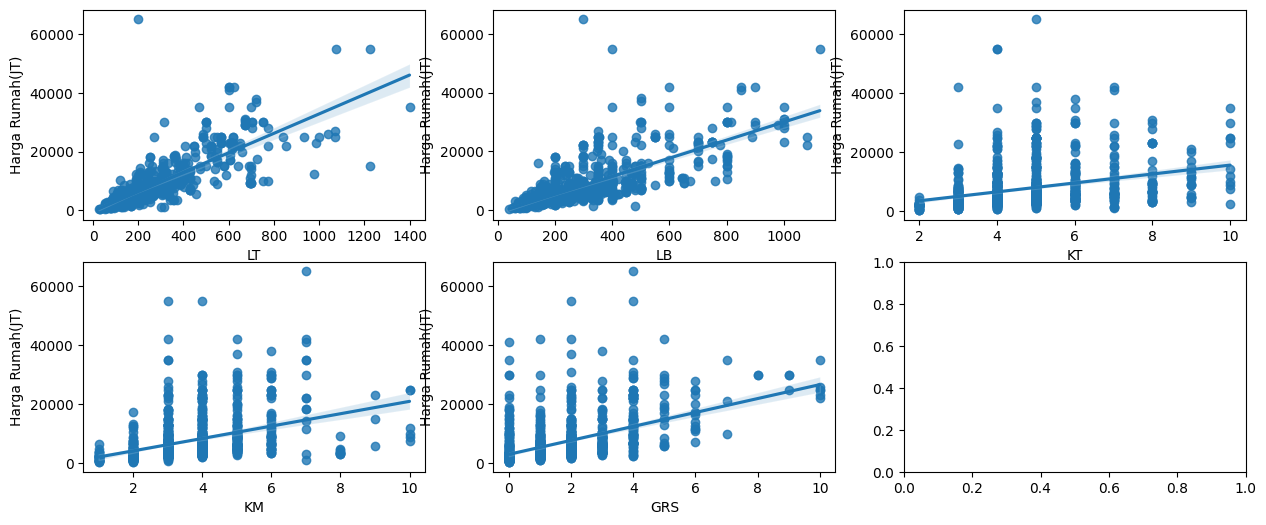

In [ ]:
# VISUALISASI HUBUNAGN LINEAR PADA SETIAP LABEL
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 6), dpi=100)
sns.set_style("ticks")
sns.regplot(data=df, x="LT", y="Harga Rumah(JT)", ax=axs[0][0])
sns.regplot(data=df, x="LB", y="Harga Rumah(JT)", ax=axs[0][1])
sns.regplot(data=df, x="KT", y="Harga Rumah(JT)", ax=axs[0][2])
sns.regplot(data=df, x="KM", y="Harga Rumah(JT)", ax=axs[1][0])
sns.regplot(data=df, x="GRS", y="Harga Rumah(JT)", ax=axs[1][1])

In [ ]:
# MEMBUAT TABLE MATRIX KORELASI
df.corr().style.background_gradient().format("{:.1f}")


,LB,LT,KT,KM,GRS,Harga Rumah(JT)
LB,1.0,0.7,0.4,0.5,0.5,0.7
LT,0.7,1.0,0.4,0.4,0.5,0.8
KT,0.4,0.4,1.0,0.7,0.3,0.3
KM,0.5,0.4,0.7,1.0,0.3,0.4
GRS,0.5,0.5,0.3,0.3,1.0,0.5
Harga Rumah(JT),0.7,0.8,0.3,0.4,0.5,1.0


In [ ]:
# UJI KORELASI KT.KM,GRS DENGAN 3 METODHE
harga_KT = df[["Harga Rumah(JT)", 'KT']]
harga_KM = df[["Harga Rumah(JT)","KM"]]
harga_GRS = df[["Harga Rumah(JT)","GRS"]]

# Pearson method
pearson_KT_harga= harga_KT.corr(method='pearson')['Harga Rumah(JT)']['KT']
pearson_KM_harga = harga_KM.corr(method='pearson')['Harga Rumah(JT)']['KM']
pearson_GRS_harga = harga_GRS.corr(method='pearson')['Harga Rumah(JT)']['GRS']

# Kendall method
kedall_KT_harga = harga_KT.corr(method='kendall')['Harga Rumah(JT)']['KT']
kendall_KM_harga = harga_KM.corr(method='kendall')['Harga Rumah(JT)']['KM']
kendall_GRS_harga = harga_GRS.corr(method='kendall')['Harga Rumah(JT)']['GRS']

# Spearman method
spearman_KT_harga = harga_KT.corr(method='spearman')['Harga Rumah(JT)']['KT']
spearman_KM_harga = harga_KM.corr(method='spearman')['Harga Rumah(JT)']['KM']
spearman_GRS_harga = harga_GRS.corr(method='spearman')['Harga Rumah(JT)']['GRS']

hasil_korelasi = pd.DataFrame({
    'item': ['HARGA vs KT', 'HARGA vs KM', 'HARGA vs GRS'],
    'pearson': [pearson_KT_harga, pearson_KT_harga, pearson_GRS_harga],
    'kendall': [kedall_KT_harga, kendall_KM_harga, kendall_GRS_harga],
    'spearman': [spearman_KT_harga, spearman_KM_harga, spearman_GRS_harga],
})

print(hasil_korelasi)

           item   pearson   kendall  spearman
0   HARGA vs KT  0.323320  0.362457  0.477077
1   HARGA vs KM  0.323320  0.424793  0.547344
2  HARGA vs GRS  0.484892  0.381156  0.476176


In [ ]:
#UJI KORELASI LB, LT 3 METODHE
harga_LB = df[["Harga Rumah(JT)", 'LB']]
harga_LT = df[["Harga Rumah(JT)","LT"]]

# Pearson method
pearson_LB_harga= harga_LB.corr(method='pearson')['Harga Rumah(JT)']['LB']
pearson_LT_harga = harga_LT.corr(method='pearson')['Harga Rumah(JT)']['LT']

# Kendall method
kedall_LB_harga = harga_LB.corr(method='kendall')['Harga Rumah(JT)']['LB']
kendall_LT_harga = harga_LT.corr(method='kendall')['Harga Rumah(JT)']['LT']

# Spearman method
spearman_LB_harga = harga_LB.corr(method='spearman')['Harga Rumah(JT)']['LB']
spearman_LT_harga = harga_LT.corr(method='spearman')['Harga Rumah(JT)']['LT']

hasil_korelasi = pd.DataFrame({
    'item': ['HARGA vs LB', 'HARGA vs LT'],
    'pearson': [pearson_LB_harga, pearson_LT_harga],
    'kendall': [kedall_LB_harga, kendall_LT_harga],
    'spearman': [spearman_LB_harga, spearman_LT_harga],
})

print(hasil_korelasi)

          item   pearson   kendall  spearman
0  HARGA vs LB  0.747083  0.631357  0.808937
1  HARGA vs LT  0.809617  0.664847  0.843240


In [ ]:
#FUNGSION PERCABANGAN HARGA
def group_data(price):
    if(price <= q[0.25]):
        return 'Harga Rendah'
    elif(price > q[0.25] and price  <= q[0.50]):
        return 'Harga Menegah'
    elif(price > q[0.50]):
        return 'Harga Tinggi'
    else:
        return '-'

In [ ]:
#MENAPILKAN HARGA TERTINGGI DAN TERENDAH
Rumah_Mahal = df['Harga Rumah(JT)'].max()
Rumah_Murah = df['Harga Rumah(JT)'].min()
q = df['Harga Rumah(JT)'].quantile([.25, .5, .75])

print("Rp",Rumah_Mahal,".000.000")
print("Rp",Rumah_Murah,".000.000")

Rp 65000 .000.000
Rp 430 .000.000


In [ ]:
#FILTERING DATA URUTAN BERDASARKAN CLASSNYA
Tingkatan_harga = df.copy()
Tingkatan_harga['KELAS HARGA'] = Tingkatan_harga['Harga Rumah(JT)'].apply(group_data)
filtered_data = Tingkatan_harga[Tingkatan_harga['KELAS HARGA'].isin(['Harga Tinggi', 'Harga Menengah', 'Harga Rendah'])]
filtered_data = filtered_data.sort_values(by='Harga Rumah(JT)', ascending=False)
filtered_data

,LB,LT,KT,KM,GRS,Harga Rumah(JT),KELAS HARGA
283,300,200,5,7,4,65000,Harga Tinggi
470,400,1075,4,3,4,55000,Harga Tinggi
474,1126,1224,4,4,2,55000,Harga Tinggi
31,900,600,7,7,1,42000,Harga Tinggi
751,600,624,3,3,2,42000,Harga Tinggi
...,...,...,...,...,...,...,...
204,90,50,3,1,0,690,Harga Rendah
921,50,55,2,1,0,650,Harga Rendah
1003,60,30,2,2,0,600,Harga Rendah
680,60,30,2,1,0,600,Harga Rendah


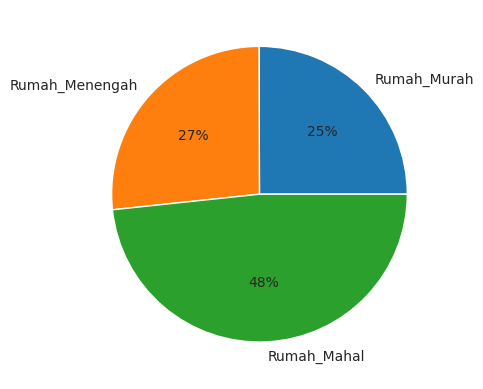

In [ ]:
#VISUALISASI DENGAN DIAGRAM PIE
Rumah_Murah = df.loc[df['Harga Rumah(JT)'] <= q[0.25]]
Rumah_Menengah = df.loc[(df['Harga Rumah(JT)'] > q[0.25]) & (df['Harga Rumah(JT)'] <= q[0.50])]
Rumah_Mahal = df.loc[df['Harga Rumah(JT)'] > q[0.50]]
labels = ['Rumah_Murah', 'Rumah_Menengah', 'Rumah_Mahal']
sizes = [len(Rumah_Murah), len(Rumah_Menengah), len(Rumah_Mahal)]

plt.pie(sizes, labels=labels, autopct='%.0f%%')
plt.show()

In [ ]:
#CLEANING COLOM TAK TERPAKAI
df.drop(['KM', 'KT', 'GRS'], axis=1, inplace=True)
df

,LB,LT,Harga Rumah(JT)
0,220,220,3800
1,180,137,4600
2,267,250,3000
3,40,25,430
4,400,355,9000
...,...,...,...
1005,450,550,9000
1006,160,140,4000
1007,139,230,4000
1008,360,606,19000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   LB               1010 non-null   int64
 1   LT               1010 non-null   int64
 2   Harga Rumah(JT)  1010 non-null   int64
dtypes: int64(3)
memory usage: 23.8 KB


In [ ]:
X = df[['LB', 'LT']].values  # Konversi ke NumPy array
y = df['Harga Rumah(JT)'].values  # Konversi ke NumPy array

In [ ]:
#MODEL KLASIFIKASI
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluasi data latih
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Evaluasi data uji
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)



In [ ]:
# Menampilkan hasil evaluasi
print('Evaluasi pada Data Latih:')
print(f'Mean Absolute Error (MAE): {mae_train:.2f}')
print(f'Mean Squared Error (MSE): {mse_train:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_train:.2f}')

print('\nEvaluasi pada Data Uji:')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print(f'Mean Squared Error (MSE): {mse_test:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.2f}')

Evaluasi pada Data Latih:
Mean Absolute Error (MAE): 2102.04
Mean Squared Error (MSE): 17111843.39
Root Mean Squared Error (RMSE): 4136.65

Evaluasi pada Data Uji:
Mean Absolute Error (MAE): 2007.78
Mean Squared Error (MSE): 11321113.38
Root Mean Squared Error (RMSE): 3364.69


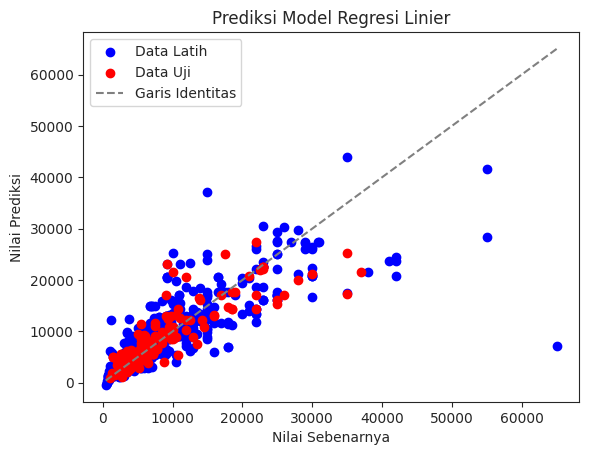

In [ ]:
#VISUALISASI REGRESI
plt.scatter(y_train, y_train_pred, color='blue', label='Data Latih')
plt.scatter(y_test, y_test_pred, color='red', label='Data Uji')


plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='gray', label='Garis Identitas')

plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi Model Regresi Linier')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [ ]:
data_baru = np.array([[200, 400]])
harga_prediksi = model.predict(data_baru)
harga_prediksi_rupiah = harga_prediksi[0] * 1000000  # Mengonversi ulang

In [ ]:
#MERUBAH CODE MENJADI FORMAT RUPIAH
def formatrupiah(uang):
    y = str(uang)
    if len(y) <= 3:
        return 'Rp ' + y
    else:
        p = y[-3:]
        q = y[:-3]
        return formatrupiah(q) + '.' + p

In [ ]:
hargarumahprediksi = int(harga_prediksi_rupiah)
print("Prediksi harga rumah impianmu di Jakarta Selatan adalah", formatrupiah(hargarumahprediksi))

Prediksi harga rumah impianmu di Jakarta Selatan adalah Rp 10.266.231.044
